#**Limpieza y Transformacion de Datos: Outliers**


---
Tema: Limpieza y Transformacion de Datos: Outliers

Unidad: 02 Análisis Descriptivo de los Datos

Materia: Programación para Analítica Descriptiva y Predictiva

Maestría en Inteligencia Artificial y Analítica de Datos

---

## Objetivo

En esta sesiòn veremos temas sobre limpieza y transformaciòn de datos, enfocado outliers (datos anómalos)


## **Definición de *Outliers***

Los *outliers*, también conocidos como puntos extremos/anormales/atípicos, son datos cuyos valores (altos o bajos) son demasiados diferentes al resto de las observaciones del conjunto de datos.



## **¿Pueden considerarse todos los valores extremos (altos o bajos) outliers?**


Algunas de las razones por las que ocurren valores atípicos en un conjunto de datos incluyen:

* Errores de medición:
  * sistemas defectuosos, como balanzas, sensores, etc.
* Errores en la captura de datos:
  * el usuario ingresa información incorrecta ya seapor escribir mal, proporcionar formatos incorrectos o intercambiar valores (errores de transposición).
* Errores en el procesamiento de datos:
  * al agregar o transformar datos. Por ejemplo, tratamiento de datos perdidos.


##**¿En qué situaciones podrían no considerarse como un valor atípico?**


*   Algunas personas que recolectan los datos, para indicar que no es un dato vacío o perdido utilizan valores extremos (positivos o negativos).
*   En una encuesta al alegir la población puede aparecer un dato que es poco frecuente, principalmente en datos sensibles o protegidos: salario muy alto, edad sobrepasa los 80 años o viceversa, género (hombre, mujer, binario, no dice), raza (caucásica vs oriental), educación.

Veamos un ejemplo de un conjunto de datos que se emplea para detección de cáncer llamado TCGA_InfoWithGrade. Este archivo está en `drive/MyDrive/Unidad02/TCGA_InfoWithGrade.csv`. Después de cargarlo procederemos imprimir  la cantidad de elementos únicos, así como la frecuencia de cada uno de dichos los elementos que están en la columna `Race`, donde : 0 - Caucásico, 1- Color, 2-Asiático, y 3 - Indios Americanos.

Observa que la cantidad de elementos que conforman a Indios Americanos es 1, lo cual podría considerarse como un `outlier`. Sin embargo no es así, ya que el problema radica en la obtención de los datos.


In [1]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Unidad02/TCGA_InfoWithGrade.csv')
df.head()

conteo_valores = df['Race'].value_counts()

print('Cantidad de valores distintos: ',conteo_valores)

Cantidad de valores distintos:  Race
0    765
1     59
2     14
3      1
Name: count, dtype: int64


## **Impacto de los Valores Atípicos**

Los valores atípicos, aunque suelen representar solo una pequeña fracción de un conjunto de datos, ejercen una influencia desproporcionada que puede comprometer su integridad. Su presencia tiene el potencial de distorsionar los resúmenes estadísticos, inducir a interpretaciones erróneas en las visualizaciones y afectar negativamente el rendimiento de los modelos.

Veamos en detalle las diversas formas en que los valores atípicos pueden distorsionar la realidad:

## Distorsión del análisis estadístico

Los valores atípicos pueden sesgar significativamente las estadísticas, dando una impresión errónea de las tendencias centrales de los datos:

* **Media y Mediana**: Un valor atípico mucho mayor o menor que el resto puede mover a la media en un dirección. En el caso de la mediana, que representa el valor central de un conjunto de datos ordenado, es menos susceptible a la influencia de valores extremos

* **Varianza y Desviación Estándar**: Los valores atípicos pueden inflar la varianza y la desviación estándar, haciendo que los datos parezcan más dispersos de lo que realmente son. Esto puede generar una representación incorreta de la variabilidad de la mayoría de los datos.

## Visualizaciones Engañosas

Los valores atípicos pueden alterar la escala y la forma de las visualizaciones, lo que puede llevar a interpretaciones incorrectas:

* **Diagramas de caja (box plots)**: Los valores atípicos pueden hacer que los diagramas de caja se extiendan excesivamente, lo que da la impresión de que la mayor parte de los datos está comprimida. Esto puede hacer que la distribución parezca menos dispersa de lo que realmente es.
* **Histogramas**: La presencia de valores atípicos puede provocar la creación de intervalos (bins) que capturen solo unos pocos valores extremos, lo que hace que otros intervalos parezcan desproporcionadamente pequeños, lo que distorsiona la forma de la distribución.


## Influencia en el rendimiento de los modelos

Los valores atípicos pueden afectar negativamente el rendimiento de los modelos predictivos:

* **Regresión**: Los valores atípicos pueden influir en la pendiente e intersección de la línea de regresión, lo que lleva a modelos que están excesivamente influenciados por valores extremos.
* **Agrupamiento (clustering)**: Los valores atípicos pueden alterar los centroides y los límites de los grupos, lo que puede provocar la creación de clústeres que no representan con precisión la distribución de los datos.


## Temas

Los temas que abordaremos en esta sección son:


1.  Detección de valores atípicos univariados y Bivariados
2. Tratamiento de valores atípicos


## **Detección de Valores Atípicos Univariados**

Los métodos que se pueden usar para detectar valores atípicos o outliers en una columna son:

1. Descripción estadística de los datos - numérica: desviación estándar
2. Columnas numéricas: Visualización por medio de boxplot, histogramas para ver la forma de la distribución
3. Z-Score para columnas numéricas
4. Columnas categóricas: histogramas


## Descripción estadística de los datos

Algunos autores como Fabio Nelly (Python Data Analytics, 2023, Apress) mencionan que es posible detectar aquellos datos atípicos usando la desviación estándar.

Si $Valor_i > (3 \times std)$ entonces es un valor atípico. Veamos un ejemplo donde generamos un dataframe con valores aleatorios. Posteriormente usamos `describe` para mostrar la desviación estándar por columna. Finalmente, mostramos los valores que cumplen con dicha regla.



In [30]:
import pandas as pd
import numpy as np

#Creamos un dataframe con 3 columnas y 1000 valores completamente aletorios

randframe = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'])
print(randframe.head(3))

#Imprimos una descripción estadística de cada columna
print('\nResumen estadístico por columna ')
print(randframe.describe())

# obtenemos para cada columna la desviación estándar
print('\nDesviación estándar por columna ')
print(randframe.std())

#Aplicamos un proceso de filtrado para obtener aquellos valores que son mayores a
# 3 veces la desviación estándar. Lo hacemos por columna

atipicos = randframe[(np.abs(randframe)>(3*randframe.std())).any(axis=1)]
print('\nValores atípicos por columna ')
print(atipicos)


          A         B         C
0 -1.517385  0.760079  0.042986
1 -1.526116  0.269594  0.295987
2 -0.312483  1.569709  0.616915

Resumen estadístico por columna 
                 A            B            C
count  1000.000000  1000.000000  1000.000000
mean      0.017467     0.012178    -0.001561
std       1.007018     0.980758     0.998123
min      -3.357612    -3.242840    -3.559251
25%      -0.669640    -0.677563    -0.690976
50%       0.079919    -0.008865    -0.001036
75%       0.702680     0.686364     0.680480
max       3.493658     3.798145     2.945970

Desviación estándar por columna 
A    1.007018
B    0.980758
C    0.998123
dtype: float64

Valores atípicos por columna 
            A         B         C
95   0.488645  2.975476  0.087401
129 -3.060768  1.364820 -1.087907
196  1.220176 -0.292174 -3.433279
256 -1.318989  3.167635 -0.660297
257 -3.357612  0.461099 -0.751386
373  3.493658 -0.297002 -0.689933
396  1.125068  3.798145  0.183097
506 -1.770234 -0.676473 -3.559251
552 -

### Práctica Detección de Valores Atípicos Univariados con HousingPricesData: Desviación Estándar

1. Descarga el conjunto de datos HousingPricesData.csv y guarda el archivo en un carpeta de tu drive.

2. Lee el conjunto de datos

3. Imprime el resumen estadístico del conjunto de datos usando `describe`.

4. Obten la desviación estándar por columna (solo si es columna de tipo numérica)

5. Aplica el proceso de obtención de outliers considerando todos los valores que son mayores a
3 veces la desviación estándar. Imprime los valores atípicos por columna.

## Detección Visual con Boxplot/Diagrama de Caja

El diagrama de caja (o boxplot) es una herramienta gráfica utilizada en estadística para representar la distribución de un conjunto de datos. Muestra la mediana, los cuartiles y los valores atípicos, lo que permite visualizar la dispersión y asimetría de los datos de manera compacta.

Para construir un diagrama de caja, se siguen estos pasos:

1. Ordenar los datos
Se organiza el conjunto de datos en orden ascendente.

2. Calcular los cuartiles. Los cuartiles dividen los datos en cuatro partes iguales:

 - Q1 (Primer Cuartil, Percentil 25): El valor que deja el 25% de los datos por debajo.
 - Q2 (Mediana, Percentil 50): El valor central de los datos.
 - Q3 (Tercer Cuartil, Percentil 75): El valor que deja el 75% de los datos por debajo.

3. Calcular el Rango Intercuartílico (IQR)
El rango intercuartílico (IQR, Interquartile Range) mide la dispersión de los datos y se calcula como:

  - $IQR = Q3 -Q1$
4. Identificar los límites para valores atípicos. Los valores atípicos (outliers) se definen utilizando los siguientes límites:
  - Límite inferior: $Q1 - 1.5 \times IQR$
  - Límite Superior: $Q3 + 1.5 \times IQR$

Los datos fuera de estos límites son considerados valores atípicos.

En Python, podemos usar las bibliotecas de Matplotlib o Seaborn.

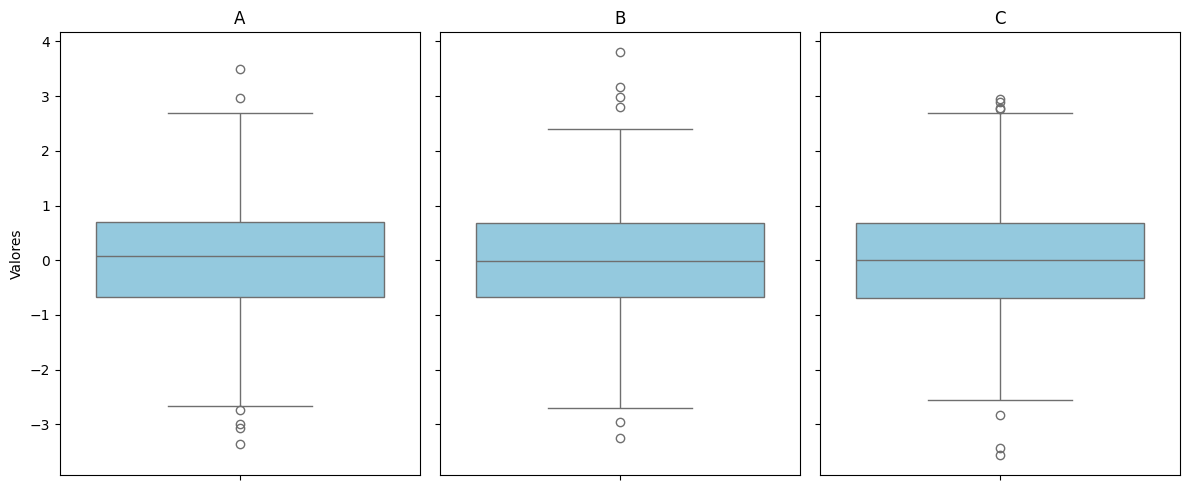

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(randframe.columns), figsize=(12, 5), sharey=True)

# Dibujar un diagrama de caja para cada columna
for i, col in enumerate(randframe.columns):
    sns.boxplot(y=randframe[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Etiqueta común para el eje Y
axes[0].set_ylabel("Valores")

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()


Podemos usar Plotly, para generar gráficos interactivos

In [32]:
import plotly.express as px
import plotly.graph_objects as go

# Crear una figura interactiva con boxplots usando Plotly
fig = go.Figure()

# Agregar un diagrama de caja para cada columna
for col in randframe.columns:
    fig.add_trace(go.Box(y=randframe[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8))

# Configurar el diseño
fig.update_layout(
    title="Diagramas de Caja Interactivos",
    yaxis_title="Valores",
    showlegend=False
)

# Mostrar la figura interactiva
fig.show()

### Práctica Detecciòn de Valores Atípicos Univariados con HousingPricesData: Boxplot

En este ejercicio de práctica usa el conjunto de datos que has cargado previamente (HousingPricesData).

1. Imprime los boxplot para cada columna numérica del conjunto de datos.

2. Detecta en qué columnas numéricas aparecen outliers.

## Podemos detectar los valores realizandos cálculos de los cuartiles.

Si los datos tienen valores atípicos extremos o asimetría se emplean los cuartiles. Veamos un ejemplo de cómo detectar los valores atípicos en todas las columnas numéricas según los diagramas de caja. Pero realizando de forma manual el cálculo de los cuartiles.

In [33]:
# Función para detectar outliers con Rango Intercuartílico (IQR) en varias columnas
def detectar_outliers_iqr(dftemp):
    outliers_dict = {}  # Diccionario para almacenar outliers por columna

    for col in dftemp.select_dtypes(include=['number']).columns:  # Solo columnas numéricas
        Q1 = dftemp[col].quantile(0.25)
        Q3 = dftemp[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtrar outliers
        outliers = dftemp[(dftemp[col] < limite_inf) | (dftemp[col] > limite_sup)]
        outliers_dict[col] = outliers[col].values  # Guardar los valores de los outliers

    return outliers_dict

# Aplicar la función a un DataFrame de ejemplo
outliers_detectados = detectar_outliers_iqr(randframe)

# Mostrar los outliers detectados
for col, outliers in outliers_detectados.items():
    print(f"Outliers en {col}: {outliers}")


Outliers en A: [-2.74435446 -3.06076803 -2.99478754 -3.35761172  2.96898323  3.49365815]
Outliers en B: [ 2.97547572  3.16763549  3.79814508 -2.94974489 -3.24284022  2.79667142]
Outliers en C: [ 2.77971646 -3.43327907 -3.55925134  2.94596957  2.88400693 -2.82347721
  2.76695268]


### Práctica Detecciòn de Valores Atípicos Univariados con HousingPricesData: Cuartiles

En este ejercicio de práctica usa el conjunto de datos que has cargado previamente (HousingPricesData).

1. Aplica el proceso de detección de outliers por medio de cuartiles sobre la columna `Price`.

2. Imprime los outliers detectados en la columna `Price` de acuerdo al mètodo de los cuartiles.

## Detección con Histogramas

Para detectar los outliers con histogramas se analiza la forma de la distribución:



*   Si es normal, los outliers estarán en los extremos
*   Si es sesgada, los outliers estarán en la cola màs larga


Es importante mencionar que los histogramas se usan para detectar outliers en variables categóricas.

Veamos un ejemplo



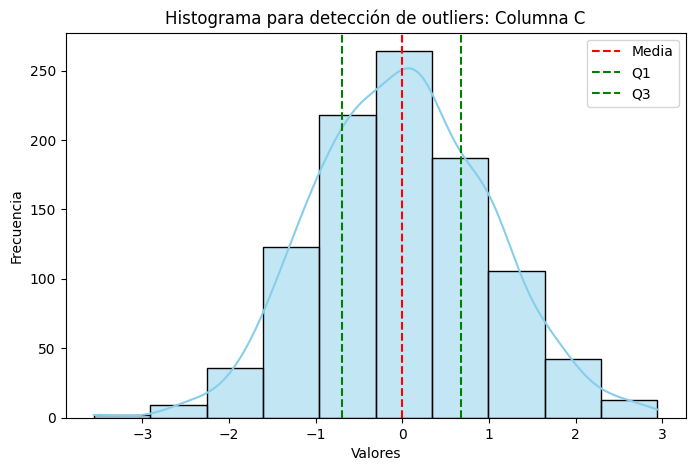

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(randframe['C'], bins=10, kde=True, color='skyblue')

# Agregar líneas de referencia para media y cuartiles
plt.axvline(randframe['C'].mean(), color='red', linestyle='dashed', label='Media')
plt.axvline(randframe['C'].quantile(0.25), color='green', linestyle='dashed', label='Q1')
plt.axvline(randframe['C'].quantile(0.75), color='green', linestyle='dashed', label='Q3')

plt.title("Histograma para detección de outliers: Columna C")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


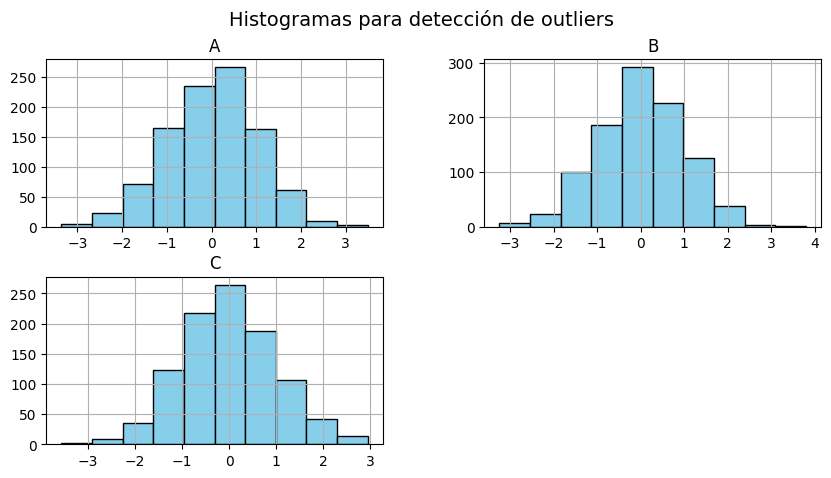

In [35]:
# Crear histogramas para todas las columnas numéricas
randframe.hist(figsize=(10, 5), bins=10, edgecolor='black', color='skyblue')

# Mostrar gráfico
plt.suptitle("Histogramas para detección de outliers", fontsize=14)
plt.show()

### Práctica Detecciòn de Valores Atípicos Univariados con HousingPricesData: Histogramas

En este ejercicio de práctica usa el conjunto de datos que has cargado previamente (HousingPricesData).

1. Aplica el proceso de detección de outliers por medio de histogramas en la columna `Price`.

2. Aplica el proceso de detección de outliers por medio de histogramas en la columna `Room`.

3. Observa en las figuras dònde se encuentran localizados los outliers.

## Detección de Outliers con Z-Score

Si los datos tienen una distribución normal, el Z-Score (puntaje Z) es una métrica estadística que nos permite identificar valores atípicos en un conjunto de datos al medir cuántas desviaciones estándar está un dato con respecto a la media. Se basa en la suposición de que los datos siguen aproximadamente una distribución normal.

El Z-Score de un valor $x$ en un conjunto de datos se calcula como:

$Z=\frac{x-\mu}{σ}$

Donde:

*   $x$ es el valor del dato
*   $\mu$ es la media del conjunto de datos (columna)
* $σ$ es la desviación estándar del conjunto de datos (columna)

El Z-Score nos dice cuántas desviaciones estándar se encuentra un dato por encima o por debajo de la media.

*¿Cómo se usa para detectar valores atípicos?*

1. Calculamos el Z-Score de cada valor en la columna.
2. Definimos un umbral, generalmente:
 + ±3: Se considera un valor atípico si su Z-Score es mayor que 3 o menor que -3.
 * ±2.5 o ±2: En algunos casos, se usan umbrales más bajos si la distribución no es perfectamente normal.

3. Filtramos valores atípicos usando este umbral

En Python usamos la librería `scipy.stasts` para convertir los valores de una columna a su respectivo valor Z-Score. Posteriormente definimos un umbral. En el ejercicio siguiente se usa el umbral = 3.

Observa que en la función para detectar los outliers, usamos `np.abs()`para tomar el valor absoluto de cada Z-Score de la columna. Esto se realiza porque Z-Score puede ser negativo (indicando un valor por debajo de la media) o positivo (in valor por arriba de la media). Sin embargo, usando el valor absoluto, nos enfocamos en la magnitud de la desviación de la media, en lugar de la dirección.




In [8]:
import pandas as pd
import numpy as np

from scipy.stats import zscore

randframe['Z-ScoreA'] = zscore(randframe['A'])
randframe['Z-ScoreB'] = zscore(randframe['B'])
randframe['Z-ScoreC'] = zscore(randframe['C'])
print(randframe.head(3))

# Definir umbral (generalmente 3)
threshold = 3

# Identificar valores atípicos
outliersA = randframe[np.abs(randframe['Z-ScoreA']) > threshold]

print("\nValores atípicos detectados:")
print(outliersA)

          A         B         C  Z-ScoreA  Z-ScoreB  Z-ScoreC
0 -1.229832  1.248513  1.191315 -1.265414  1.193210  1.217725
1 -1.036834 -0.805677 -0.767327 -1.066059 -0.828438 -0.748874
2 -1.436126 -0.569911  1.362801 -1.478503 -0.596407  1.389907

Valores atípicos detectados:
            A         B         C  Z-ScoreA  Z-ScoreB  Z-ScoreC
263 -2.928263 -0.998322  0.955763 -3.019791 -1.018032  0.981215
900 -2.927361 -0.006935 -0.248855 -3.018860 -0.042349 -0.228296


### Práctica Detecciòn de Valores Atípicos Univariados con HousingPricesData: Z-Score

En este ejercicio de práctica usa el conjunto de datos que has cargado previamente (HousingPricesData).

1. Antes de aplicar este procedimiento sobre la columna `Price`, elimina las filas donde la columna `Price` tiene valores NA. No modifiques el conjunto original

2. Aplica el proceso de detección de outliers por medio de Z-Score en la columna `Price`. Crea una nueva column que contenga el valor de Z-Score de `Price`

3. Identifica e imprime los valores atípicos empleando un umbral = 3


# Tratamiento de valores atípicos/anómalos univariados.


Los métodos para tratar el problema de los valores atípicos son los siguientes: 1. Eliminación, 2. Recorte (Trimming), 3. Winsorización (Winsorizing).

A continuación explicaremos màs a detalle cada una de ellas.

## **1. Eliminación**

La eliminación de valores atípicos se refiere al proceso de eliminar puntos de datos en un conjunto que se consideran inusualmente extremos o lejos del patrón general de los datos.

Eliminar valores atípicos implica ciertos compromisos:

* Por un lado, es la forma más sencilla de manejar valores extremos.
* Por otro lado, reduce el tamaño de la muestra y puede provocar la pérdida de información valiosa.
* Además, si los valores atípicos no son errores genuinos, sino que representan una variabilidad legítima en los datos, su eliminación puede introducir sesgo en el análisis.


En el siguiente ejemplo vamos a usar la columna 'B' del conjunto `randframe`. Mostraremos la estadística de dicha columna antes y después de la eliminación de outliers. Observa los cambios en la media, desviación estándar.

Emplearemos el método de los cuartiles para detectar los outliers, los cuales eliminaremos. Posteriormente imprimiremos los histogramas en su versión con outlier y sin outlier.


Resumen estadístico en la Columna B antes de la Eliminación :
count    1000.000000
mean        0.012178
std         0.980758
min        -3.242840
25%        -0.677563
50%        -0.008865
75%         0.686364
max         3.798145
Name: B, dtype: float64

Resumen estadístico en la Columna B después de la Eliminación :
count    994.000000
mean       0.005667
std        0.952386
min       -2.705016
25%       -0.676194
50%       -0.009392
75%        0.670759
max        2.395301
Name: B, dtype: float64


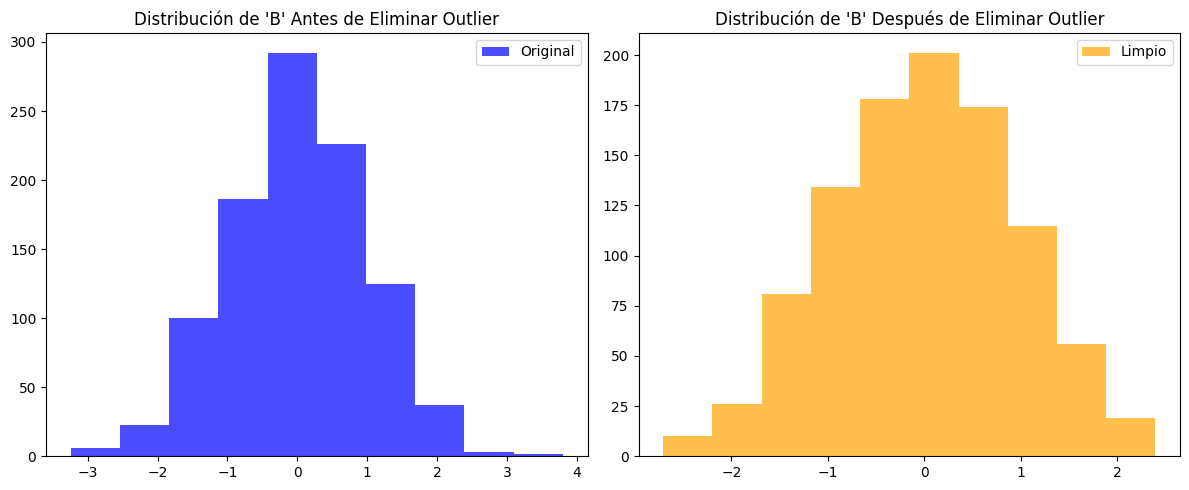

Text(0.5, 1.0, 'Limpia')

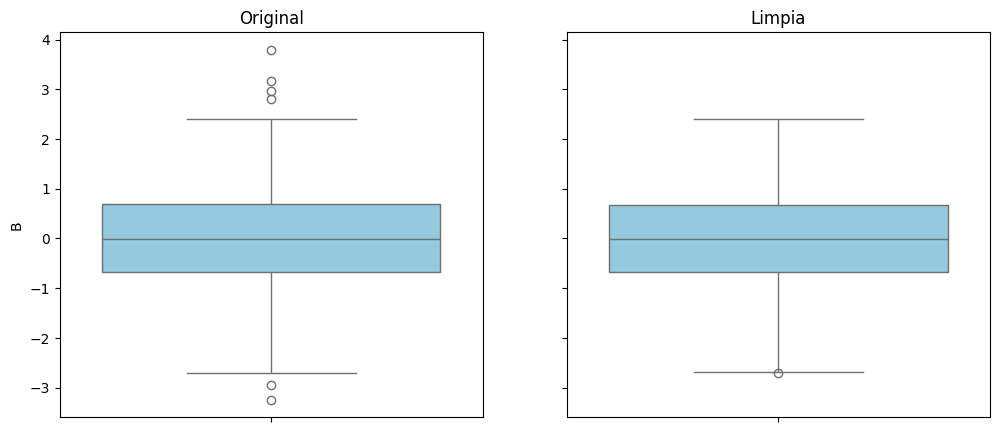

In [39]:
#imprimir las estadísticas del conjunto original
print("\nResumen estadístico en la Columna B antes de la Eliminación :")
print(randframe['B'].describe())

# Identificación por medio del método IQR
Q1 = randframe['B'].quantile(0.25)
Q3 = randframe['B'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

#Obtiene un conjunto
rd_no_outliers = randframe[(randframe['B'] >= lower_bound) & (randframe['B'] <= upper_bound)].copy()

# Imprime el resumen estadísticos después de eliminar los outliers
print("\nResumen estadístico en la Columna B después de la Eliminación :")
print(rd_no_outliers['B'].describe())

# Plot the distributions after outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribución de 'B' Antes de Eliminar Outlier")
plt.hist(randframe['B'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribución de 'B' Después de Eliminar Outlier")
plt.hist(rd_no_outliers['B'], bins=10, color='orange', alpha=0.7, label='Limpio')
plt.legend()

plt.tight_layout()
plt.show()



# Diagrama de Cajas antes y después



fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(y=randframe['B'], ax=axes[0], color='skyblue')
axes[0].set_title('Original')

sns.boxplot(y=rd_no_outliers['B'], ax=axes[1], color='skyblue')
axes[1].set_title('Limpia')

## **2. Recorte (Trimming)**

El recorte consiste en eliminar un cierto porcentaje de datos de ambos extremos de una distribución y luego calcular la media. Para aplicar el recorte, es necesario definir una fracción de recorte, que representa la proporción de datos que se eliminará de ambos extremos de la distribución al calcular la media recortada.

Esta técnica se utiliza para excluir un porcentaje específico de valores extremos (atípicos) en el cálculo de la media. La fracción de recorte es un valor entre 0 y 0.5, con las siguientes interpretaciones:

* 0 significa que no se recorta nada (se incluyen todos los datos).
* 0.1 indica que se elimina el 10% de los datos de cada extremo.
* 0.2 indica que se elimina el 20% de los datos de cada extremo.
* 0.5 significa que se elimina el 50% de los datos de cada extremo (excluyendo los valores más extremos).

El siguiente código de ejemplo demuestra este proceso de recorte. Como seguimos trabajando con el mismo conjunto de datos, omitiremos la creación del DataFrame aquí.

Vamos a usar el 10%

Original Dataset Statistics:
                 A            B            C
count  1000.000000  1000.000000  1000.000000
mean      0.017467     0.012178    -0.001561
std       1.007018     0.980758     0.998123
min      -3.357612    -3.242840    -3.559251
25%      -0.669640    -0.677563    -0.690976
50%       0.079919    -0.008865    -0.001036
75%       0.702680     0.686364     0.680480
max       3.493658     3.798145     2.945970

Trimmed Dataset Statistics:
                A           B           C
count  800.000000  800.000000  800.000000
mean     0.025274    0.013761   -0.000084
std      1.002751    0.659807    1.011703
min     -3.357612   -1.272510   -3.559251
25%     -0.631858   -0.482713   -0.734074
50%      0.079919   -0.008865   -0.007972
75%      0.703880    0.567687    0.727923
max      3.493658    1.258116    2.945970

Trimmed Mean:
A    0.025274
B    0.013761
C   -0.000084
dtype: float64


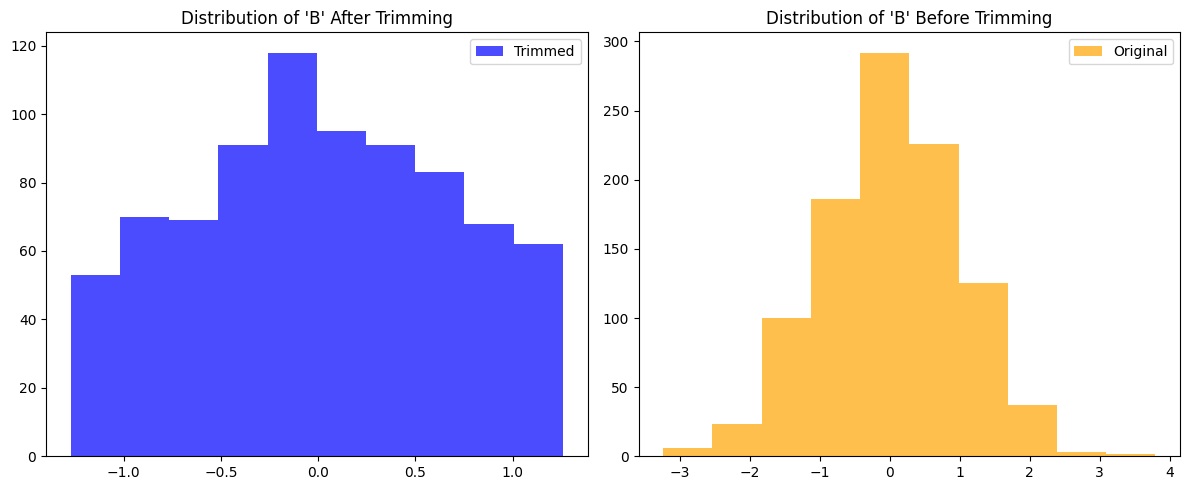

In [41]:
 # Display the original dataset statistics
print("Original Dataset Statistics:")
print(randframe.describe())

 # Eliminar el 10% de cada lado de la distribución de la columna B
df_trimmed = randframe[(randframe['B'] >= randframe['B'].quantile(0.1)) & (randframe['B'] <= randframe['B'].quantile(0.9))]

# Calculate trimmed mean for each column
df_trimmed_mean = df_trimmed.mean()

# Display the trimmed dataset statistics
print("\nTrimmed Dataset Statistics:")
print(df_trimmed.describe())

# Display the trimmed mean for each column
print("\nTrimmed Mean:")
print(df_trimmed_mean)

# Plot the distributions after trimming
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'B' After Trimming")
plt.hist(df_trimmed['B'], bins=10, color='blue', alpha=0.7, label='Trimmed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'B' Before Trimming")
plt.hist(randframe['B'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

## **3. Winsorización**
En lugar de eliminar directamente los valores extremos como en el recorte, la winsorización consiste en reemplazarlos por valores menos extremos. Los valores extremos se sustituyen por valores más cercanos al centro de la distribución, generalmente en un percentil específico.

La winsorización es útil cuando se desea conservar el tamaño del conjunto de datos, además de ayudar a preservar la forma general de la distribución de los datos.

El módulo `scipy.stats.mstats` en `SciPy` proporciona herramientas estadísticas que manejan datos con valores faltantes. Dentro de este módulo, la función `winsorize` permite aplicar la técnica de winsorización, que reemplaza los valores extremos de un conjunto de datos por valores más cercanos al centro de la distribución en un percentil determinado.

Sintaxis



```python
from scipy.stats.mstats import winsorize

winsorized_data = winsorize(data, limits=(lower_limit, upper_limit))

```

Parámetros
- data: Array o lista de datos numéricos.
- limits: Tupla (lower_limit, upper_limit), donde:
- lower_limit es la fracción de datos a recortar en la cola inferior.
- upper_limit es la fracción de datos a recortar en la cola superior.
Ambos valores están en el rango [0, 0.5].

Ejemplo: (0.1, 0.1) significa que los valores más bajos del 10% y los más altos del 10% serán reemplazados por los valores del percentil 10 y 90, respectivamente.

En la literatura a este proceso también se le conoce como:

- Recorte (flooring) que implica reemplazar los valores extremos más pequeños con un valor mínimo predeterminado, como el valor del percentil 10.

- Limitación (capping) implica reemplazar los valores extremos más grandes con un valor máximo predeterminado, como el valor del percentil 90.

Veamos un ejemplo y observa los cambios en la media y demás valores.

Original Dataset Statistics Column B:
count    1000.000000
mean        0.012178
std         0.980758
min        -3.242840
25%        -0.677563
50%        -0.008865
75%         0.686364
max         3.798145
Name: B, dtype: float64

Dataset Statistics after Winsorizing Column B:
count    1000.000000
mean        0.009570
std         0.817791
min        -1.272510
25%        -0.677563
50%        -0.008865
75%         0.686364
max         1.258116
Name: B_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




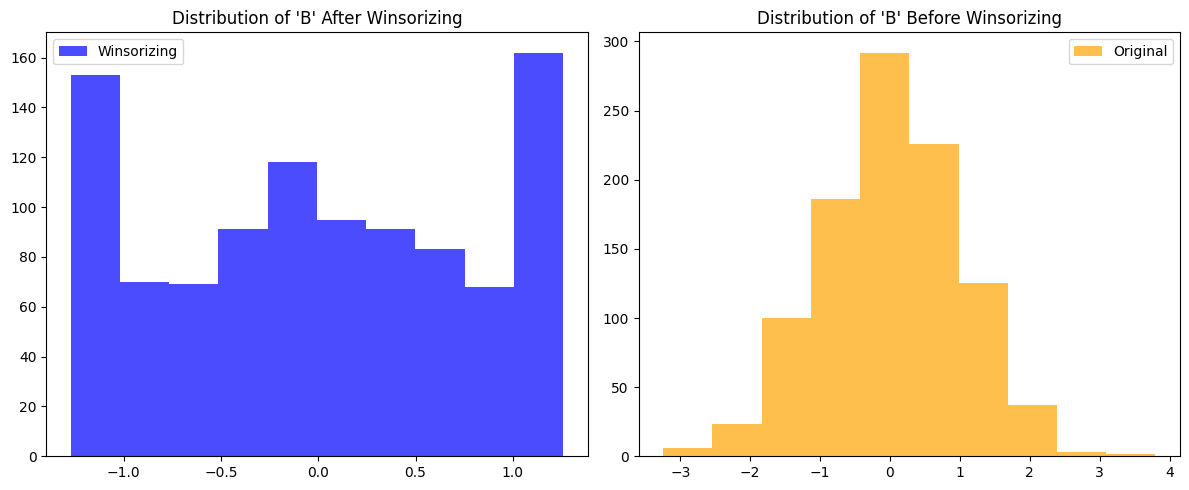

In [44]:
from scipy.stats.mstats import winsorize

# Display the original dataset statistics
print("Original Dataset Statistics Column B:")
print(randframe['B'].describe())

# Identify and handle outliers using winsorizing for 'Age' column
winsorizing_fraction = 0.1
randframe['B_Winsorized'] = winsorize(randframe['B'], limits=[winsorizing_fraction, winsorizing_fraction])

# Display the dataset statistics after winsorizing
print("\nDataset Statistics after Winsorizing Column B:")
print(randframe['B_Winsorized'].describe())


# Plot the distributions after Winsorizing
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'B' After Winsorizing")
plt.hist(randframe['B_Winsorized'], bins=10, color='blue', alpha=0.7, label='Winsorizing')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'B' Before Winsorizing")
plt.hist(randframe['B'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()



En literatura se menciona que la sustitución de los valores puede ser con:

*   Medidas estadísticas: media, mediana, moda
*   Interpolación
* Modelos basados en métodos de aprendizaje automático.





## Ejercicios Prácticos

Aplica los tres métodos al conjunto de datos HousingPricesData.csv  en la columna Price.

# Identificación de Outliers en dos o más columnas.

En problemas de dos columnas las estrategias adoptadas son:



1.   Si ambas columnas son numéricas se usa un diagrama de dispersion
2.   Si una columna es categórica y la otra numérica entonces diagramas de caja.


No obstante su tratamiento se raliza por medio de métodos avanzados que están fuera del alcance de esta materia.

